<font size="3"><b>BoE Data Scientist Application - Data Analysis Task - Applicant ID 334599</b></font>

<font size="3"><b>Import Libraries</b></font>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
pd.set_option('display.max_columns', None)

<font size="3"><b>Load Data File</b></font>

In [2]:
# Data already uploaded to below GitHub repository
url = 'https://github.com/github-byhk/334599/blob/main/Data%20for%20technical%20assessment.xlsx?raw=true'
filename = pd.ExcelFile(url)
# Check what are the sheets in the Excel file
raw_data = pd.ExcelFile(filename)
raw_data.sheet_names

['Dataset 1 - General', 'Dataset 2 - Underwriting']

<font size="3"><b>Preview the Excel File</b></font>

In [3]:
# Load separate sheets
data1 = pd.read_excel(filename, sheet_name = raw_data.sheet_names[0], index_col=0)
data2 = pd.read_excel(filename, sheet_name = raw_data.sheet_names[1], index_col=0)

In [4]:
# Preview data1
data1.head()

,NWP (£m),NWP (£m) .1,NWP (£m) .2,NWP (£m) .3,NWP (£m) .4,SCR (£m),SCR (£m).1,SCR (£m).2,SCR (£m).3,SCR (£m).4,EoF for SCR (£m),EoF for SCR (£m).1,EoF for SCR (£m).2,EoF for SCR (£m).3,EoF for SCR (£m).4,SCR coverage ratio,SCR coverage ratio.1,SCR coverage ratio.2,SCR coverage ratio.3,SCR coverage ratio.4,GWP (£m),GWP (£m).1,GWP (£m).2,GWP (£m).3,GWP (£m).4,Total assets (£m),Total assets (£m).1,Total assets (£m).2,Total assets (£m).3,Total assets (£m).4,Total liabilities (£m),Total liabilities (£m).1,Total liabilities (£m).2,Total liabilities (£m).3,Total liabilities (£m).4,Excess of assets over liabilities (£m) [= equity],Excess of assets over liabilities (£m) [= equity].1,Excess of assets over liabilities (£m) [= equity].2,Excess of assets over liabilities (£m) [= equity].3,Excess of assets over liabilities (£m) [= equity].4
NaN,2016YE,2017YE,2018YE,2019YE,2020YE,2016YE,2017YE,2018YE,2019YE,2020YE,2016YE,2017YE,2018YE,2019YE,2020YE,2016YE,2017YE,2018YE,2019YE,2020YE,2016YE,2017YE,2018YE,2019YE,2020YE,2016YE,2017YE,2018YE,2019YE,2020YE,2016YE,2017YE,2018YE,2019YE,2020YE,2016YE,2017YE,2018YE,2019YE,2020YE
Firm 1,-13779.815629,0,0,0,0,1085.360139,0.0,0,0,0,2230.076702,4.81792,0,0,0,1.979865,481792000,0,0,0,1409.484796,0,0,0,0,71727.593066,4.81792,0,0,0,69696.557128,0,0,0,0,2031.035937,4.81792,0,0,0
Firm 2,28.178059,26.865049,25.064438,23.226445,21.718558,10.190314,10.113572,9.495235,8.146471,7.324577,33.39118,40.637281,50.621614,57.602326,29.6524,3.15743,3.871771,5.137122,6.813341,3.900918,28.178059,26.865049,25.064438,23.226445,21.718558,41.917496,50.222975,59.217625,64.535227,38.178685,8.526315,9.585694,8.596011,6.932901,8.526285,33.39118,40.637281,50.621614,57.602326,29.6524
Firm 3,0,75.609681,70.578732,78.432782,85.73583,322.955115,363.782327,362.290859,394.295982,400.69954,583.650604,558.916856,566.073253,598.338699,540.065747,1.741407,1.480455,1.505583,1.462225,1.298726,0,85.810205,79.549617,91.814111,96.416626,1509.716271,1575.318545,1540.807153,1630.835732,1754.979053,926.065667,1016.401689,974.7339,1032.497033,1214.913306,583.650604,558.916856,566.073253,598.338699,540.065747
Firm 4,22344.199923,23963.910709,25760.390158,25512.748836,24996.021042,16573.6448,16332.7488,17103.616,17219.24608,19600.262144,23862.762984,23493.658823,25284.403791,26861.460363,28772.492631,1.38737,1.386057,1.424473,1.50316,1.414507,29424.574692,32935.401421,35867.637982,36135.463107,34922.702554,67404.349129,73034.62926,81184.829269,84801.523977,94065.081033,50485.0106,56618.706223,62935.244436,64005.547967,71237.710999,16919.338528,16415.923037,18249.584833,20795.97601,22827.370034


In [5]:
# Preview data2
data2.head()

,Gross claims incurred (£m),Gross claims incurred (£m).1,Gross claims incurred (£m).2,Gross claims incurred (£m).3,Gross claims incurred (£m).4,"Gross BEL (inc. TPs as whole, pre-TMTP) (£m)","Gross BEL (inc. TPs as whole, pre-TMTP) (£m).1","Gross BEL (inc. TPs as whole, pre-TMTP) (£m).2","Gross BEL (inc. TPs as whole, pre-TMTP) (£m).3","Gross BEL (inc. TPs as whole, pre-TMTP) (£m).4","Net BEL (inc. TPs as a whole, pre-TMTP) (£m)","Net BEL (inc. TPs as a whole, pre-TMTP) (£m).1","Net BEL (inc. TPs as a whole, pre-TMTP) (£m).2","Net BEL (inc. TPs as a whole, pre-TMTP) (£m).3","Net BEL (inc. TPs as a whole, pre-TMTP) (£m).4",Pure net claims ratio,Pure net claims ratio.1,Pure net claims ratio.2,Pure net claims ratio.3,Pure net claims ratio.4,Net expense ratio,Net expense ratio.1,Net expense ratio.2,Net expense ratio.3,Net expense ratio.4,Net combined ratio,Net combined ratio.1,Net combined ratio.2,Net combined ratio.3,Net combined ratio.4,Pure gross claims ratio,Pure gross claims ratio.1,Pure gross claims ratio.2,Pure gross claims ratio.3,Pure gross claims ratio.4,Gross expense ratio,Gross expense ratio.1,Gross expense ratio.2,Gross expense ratio.3,Gross expense ratio.4,Gross combined ratio,Gross combined ratio.1,Gross combined ratio.2,Gross combined ratio.3,Gross combined ratio.4
NaN,2016YE,2017YE,2018YE,2019YE,2020YE,2016YE,2017YE,2018YE,2019YE,2020YE,2016YE,2017YE,2018YE,2019YE,2020YE,2016YE,2017YE,2018YE,2019YE,2020YE,2016YE,2017YE,2018YE,2019YE,2020YE,2016YE,2017YE,2018YE,2019YE,2020YE,2016YE,2017YE,2018YE,2019YE,2020YE,2016YE,2017YE,2018YE,2019YE,2020YE,2016YE,2017YE,2018YE,2019YE,2020YE
Firm 1,0,0.046674,0,0,0,0,7.674468,0,0,0,0,7.674468,0,0,0,0,11.401514,0,0,0,0,56.813725,0,0,0,0,68.215239,0,0,0,0,11.401514,0,0,0,0,56.813725,0,0,0,0,68.215239,0,0,0
Firm 2,39.241067,35.948249,29.002244,0,0,163.597907,195.529933,201.533018,0,0,162.952368,182.739117,188.595981,0,0,0.194265,0.159313,0.122461,0,0,0.761028,0.997631,0.821159,0,0,0.955292,1.156944,0.94362,0,0,0.202128,0.163293,0.124608,0,0,0.743265,0.963451,0.814588,0,0,0.945394,1.126744,0.939197,0,0
Firm 3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Firm 4,17.125976,75.535951,119.426995,35.884204,6.567988,-18.297099,22.640145,80.383783,99.569129,43.572261,-8.078498,28.170346,78.491191,92.384284,55.424782,0.879768,1.493519,1.956767,2.350906,-3.197191,0.200441,0.213772,0.162274,0.235351,-0.211279,1.080209,1.707291,2.119041,2.586257,-3.40847,0.704102,1.327259,1.634997,1.154042,-10.189846,0.14393,0.147519,0.092971,0.054781,-0.546237,0.848032,1.474778,1.727968,1.208823,-10.736084


In [6]:
# The Excel file use first 2 rows as header.  Fix the column header.
data1 = pd.read_excel(filename, sheet_name = raw_data.sheet_names[0], header=[0, 1], index_col=0)
data1.index.names = ['FirmID']
data1.columns = data1.columns.to_flat_index()
data2 = pd.read_excel(filename, sheet_name = raw_data.sheet_names[1], header=[0, 1], index_col=0)
data2.index.names = ['FirmID']
data2.columns = data2.columns.to_flat_index()

# Check data dimensions
print(data1.shape)
print(data2.shape)

(325, 40)
(325, 45)


<font size="3"><b>Join the tables from two sheets. Quick check data type and null counts.</b></font>

In [7]:
# Merge data and confirm
data = pd.concat([data1, data2],axis=1)

# Confirm data properly merged by checking dataframe dimension
print(data.shape)

(325, 85)


In [8]:
# Preview merged data
data.head()

,"(NWP (£m) , 2016YE)","(NWP (£m) , 2017YE)","(NWP (£m) , 2018YE)","(NWP (£m) , 2019YE)","(NWP (£m) , 2020YE)","(SCR (£m), 2016YE)","(SCR (£m), 2017YE)","(SCR (£m), 2018YE)","(SCR (£m), 2019YE)","(SCR (£m), 2020YE)","(EoF for SCR (£m), 2016YE)","(EoF for SCR (£m), 2017YE)","(EoF for SCR (£m), 2018YE)","(EoF for SCR (£m), 2019YE)","(EoF for SCR (£m), 2020YE)","(SCR coverage ratio, 2016YE)","(SCR coverage ratio, 2017YE)","(SCR coverage ratio, 2018YE)","(SCR coverage ratio, 2019YE)","(SCR coverage ratio, 2020YE)","(GWP (£m), 2016YE)","(GWP (£m), 2017YE)","(GWP (£m), 2018YE)","(GWP (£m), 2019YE)","(GWP (£m), 2020YE)","(Total assets (£m), 2016YE)","(Total assets (£m), 2017YE)","(Total assets (£m), 2018YE)","(Total assets (£m), 2019YE)","(Total assets (£m), 2020YE)","(Total liabilities (£m), 2016YE)","(Total liabilities (£m), 2017YE)","(Total liabilities (£m), 2018YE)","(Total liabilities (£m), 2019YE)","(Total liabilities (£m), 2020YE)","(Excess of assets over liabilities (£m) [= equity], 2016YE)","(Excess of assets over liabilities (£m) [= equity], 2017YE)","(Excess of assets over liabilities (£m) [= equity], 2018YE)","(Excess of assets over liabilities (£m) [= equity], 2019YE)","(Excess of assets over liabilities (£m) [= equity], 2020YE)","(Gross claims incurred (£m), 2016YE)","(Gross claims incurred (£m), 2017YE)","(Gross claims incurred (£m), 2018YE)","(Gross claims incurred (£m), 2019YE)","(Gross claims incurred (£m), 2020YE)","(Gross BEL (inc. TPs as whole, pre-TMTP) (£m), 2016YE)","(Gross BEL (inc. TPs as whole, pre-TMTP) (£m), 2017YE)","(Gross BEL (inc. TPs as whole, pre-TMTP) (£m), 2018YE)","(Gross BEL (inc. TPs as whole, pre-TMTP) (£m), 2019YE)","(Gross BEL (inc. TPs as whole, pre-TMTP) (£m), 2020YE)","(Net BEL (inc. TPs as a whole, pre-TMTP) (£m), 2016YE)","(Net BEL (inc. TPs as a whole, pre-TMTP) (£m), 2017YE)","(Net BEL (inc. TPs as a whole, pre-TMTP) (£m), 2018YE)","(Net BEL (inc. TPs as a whole, pre-TMTP) (£m), 2019YE)","(Net BEL (inc. TPs as a whole, pre-TMTP) (£m), 2020YE)","(Pure net claims ratio, 2016YE)","(Pure net claims ratio, 2017YE)","(Pure net claims ratio, 2018YE)","(Pure net claims ratio, 2019YE)","(Pure net claims ratio, 2020YE)","(Net expense ratio, 2016YE)","(Net expense ratio, 2017YE)","(Net expense ratio, 2018YE)","(Net expense ratio, 2019YE)","(Net expense ratio, 2020YE)","(Net combined ratio, 2016YE)","(Net combined ratio, 2017YE)","(Net combined ratio, 2018YE)","(Net combined ratio, 2019YE)","(Net combined ratio, 2020YE)","(Pure gross claims ratio, 2016YE)","(Pure gross claims ratio, 2017YE)","(Pure gross claims ratio, 2018YE)","(Pure gross claims ratio, 2019YE)","(Pure gross claims ratio, 2020YE)","(Gross expense ratio, 2016YE)","(Gross expense ratio, 2017YE)","(Gross expense ratio, 2018YE)","(Gross expense ratio, 2019YE)","(Gross expense ratio, 2020YE)","(Gross combined ratio, 2016YE)","(Gross combined ratio, 2017YE)","(Gross combined ratio, 2018YE)","(Gross combined ratio, 2019YE)","(Gross combined ratio, 2020YE)"
FirmID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Firm 1,-13779.815629,0.000000,0.000000,0.000000,0.000000,1085.360139,9.635840e-09,0.000000,0.000000,0.000000,2230.076702,4.817920,0.000000,0.000000,0.000000,1.979865,4.817920e+08,0.000000,0.000000,0.000000,1409.484796,0.000000,0.000000,0.000000,0.000000,71727.593066,4.817920,0.000000,0.000000,0.000000,69696.557128,0.000000,0.000000,0.000000,0.000000,2031.035937,4.817920,0.000000,0.000000,0.000000,0.000000,0.046674,0.000000,0.000000,0.000000,0.000000,7.674468,0.000000,0.000000,0.000000,0.000000,7.674468,0.000000,0.000000,0.000000,0.000000,11.401514,0.000000,0.000000,0.000000,0.000000,56.813725,0.000000,0.000000,0.000000,0.000000,68.215239,0.000000,0.000000,0.000000,0.000000,11.401514,0.000000,0.000000,0.000000,0.000000,56.813725,0.000000,0.000000,0.000000,0.000000,68.215239,0.000000,0.000000,0.000000
Firm 2,28.178059,26.865049,25.064438,23.226445,21.718558,10.190314,1.011357e+01,9.495235,8.14647

In [9]:
# Get a sense of data variables type and null counts.
# Apparently no missing data, and all data are numeric
data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 325 entries, Firm 1 to Firm 325
Data columns (total 85 columns):
 #   Column                                                       Non-Null Count  Dtype  
---  ------                                                       --------------  -----  
 0   (NWP (£m) , 2016YE)                                          325 non-null    float64
 1   (NWP (£m) , 2017YE)                                          325 non-null    float64
 2   (NWP (£m) , 2018YE)                                          325 non-null    float64
 3   (NWP (£m) , 2019YE)                                          325 non-null    float64
 4   (NWP (£m) , 2020YE)                                          325 non-null    float64
 5   (SCR (£m), 2016YE)                                           325 non-null    float64
 6   (SCR (£m), 2017YE)                                           325 non-null    float64
 7   (SCR (£m), 2018YE)                                           325 non-null  

C:\Users\Ben\AppData\Local\Temp\ipykernel_13756\1206126729.py:3: FutureWarning: null_counts is deprecated. Use show_counts instead
  data.info(verbose=True, null_counts=True)


<font size="3"><b>Rename columns and adding other ratios/changes columns</b></font>

In [10]:
# Rename the headers for easier manipulation
header = ['NWP_GBPm_2016','NWP_GBPm_2017','NWP_GBPm_2018','NWP_GBPm_2019','NWP_GBPm_2020',
          'SCR_GBPm_2016','SCR_GBPm_2017','SCR_GBPm_2018','SCR_GBPm_2019','SCR_GBPm_2020',
          'EOF_GBPm_2016','EOF_GBPm_2017','EOF_GBPm_2018','EOF_GBPm_2019','EOF_GBPm_2020',
          'SCR_Ratio_2016','SCR_Ratio_2017','SCR_Ratio_2018','SCR_Ratio_2019','SCR_Ratio_2020',
          'GWP_GBPm_2016','GWP_GBPm_2017','GWP_GBPm_2018','GWP_GBPm_2019','GWP_GBPm_2020',
          'TotAsset_GBPm_2016','TotAsset_GBPm_2017','TotAsset_GBPm_2018','TotAsset_GBPm_2019','TotAsset_GBPm_2020',
          'TotLiab_GBPm_2016','TotLiab_GBPm_2017','TotLiab_GBPm_2018','TotLiab_GBPm_2019','TotLiab_GBPm_2020',
          'Equity_GBPm_2016','Equity_GBPm_2017','Equity_GBPm_2018','Equity_GBPm_2019','Equity_GBPm_2020',
          'GrossClaims_GBPm_2016','GrossClaims_GBPm_2017','GrossClaims_GBPm_2018','GrossClaims_GBPm_2019','GrossClaims_GBPm_2020',
          'GrossBEL_GBPm_2016','GrossBEL_GBPm_2017','GrossBEL_GBPm_2018','GrossBEL_GBPm_2019','GrossBEL_GBPm_2020',
          'NetBEL_GBPm_2016','NetBEL_GBPm_2017','NetBEL_GBPm_2018','NetBEL_GBPm_2019','NetBEL_GBPm_2020',
          'PureNC_Ratio_2016','PureNC_Ratio_2017','PureNC_Ratio_2018','PureNC_Ratio_2019','PureNC_Ratio_2020',
          'NetExp_Ratio_2016','NetExp_Ratio_2017','NetExp_Ratio_2018','NetExp_Ratio_2019','NetExp_Ratio_2020',
          'NetComb_Ratio_2016','NetComb_Ratio_2017','NetComb_Ratio_2018','NetComb_Ratio_2019','NetComb_Ratio_2020',
          'PureGC_Ratio_2016','PureGC_Ratio_2017','PureGC_Ratio_2018','PureGC_Ratio_2019','PureGC_Ratio_2020',
          'GrossExp_Ratio_2016','GrossExp_Ratio_2017','GrossExp_Ratio_2018','GrossExp_Ratio_2019','GrossExp_Ratio_2020',
          'GrossComb_Ratio_2016','GrossComb_Ratio_2017','GrossComb_Ratio_2018','GrossComb_Ratio_2019','GrossComb_Ratio_2020']

data.columns = header

In [11]:
# Find out how much risk passed to reinsurer
data['NWP_as_pct_GWP_2016'] = np.where(data['GWP_GBPm_2016'] == 0, 1, data['NWP_GBPm_2016'] / data['GWP_GBPm_2016'])
data['NWP_as_pct_GWP_2017'] = np.where(data['GWP_GBPm_2017'] == 0, 1, data['NWP_GBPm_2017'] / data['GWP_GBPm_2017'])
data['NWP_as_pct_GWP_2018'] = np.where(data['GWP_GBPm_2018'] == 0, 1, data['NWP_GBPm_2018'] / data['GWP_GBPm_2018'])
data['NWP_as_pct_GWP_2019'] = np.where(data['GWP_GBPm_2019'] == 0, 1, data['NWP_GBPm_2019'] / data['GWP_GBPm_2019'])
data['NWP_as_pct_GWP_2020'] = np.where(data['GWP_GBPm_2020'] == 0, 1, data['NWP_GBPm_2020'] / data['GWP_GBPm_2020'])

# Get the yoy changes for each data, from 2017 to 2020
# Net Written Premium
data['NWP_yoy_2017'] = (data['NWP_GBPm_2017'] - data['NWP_GBPm_2016']) / abs(data['NWP_GBPm_2016'])
data['NWP_yoy_2018'] = (data['NWP_GBPm_2018'] - data['NWP_GBPm_2017']) / abs(data['NWP_GBPm_2017'])
data['NWP_yoy_2019'] = (data['NWP_GBPm_2019'] - data['NWP_GBPm_2018']) / abs(data['NWP_GBPm_2018'])
data['NWP_yoy_2020'] = (data['NWP_GBPm_2020'] - data['NWP_GBPm_2019']) / abs(data['NWP_GBPm_2019'])
data['NWP_CAGR'] = pow((1 + ((data['NWP_GBPm_2020'] - data['NWP_GBPm_2017']) / data['NWP_GBPm_2017'])), 0.25)

# Solvency Capital Requirement
data['SCR_yoy_2017'] = (data['SCR_GBPm_2017'] - data['SCR_GBPm_2016']) / abs(data['SCR_GBPm_2016'])
data['SCR_yoy_2018'] = (data['SCR_GBPm_2018'] - data['SCR_GBPm_2017']) / abs(data['SCR_GBPm_2017'])
data['SCR_yoy_2019'] = (data['SCR_GBPm_2019'] - data['SCR_GBPm_2018']) / abs(data['SCR_GBPm_2018'])
data['SCR_yoy_2020'] = (data['SCR_GBPm_2020'] - data['SCR_GBPm_2019']) / abs(data['SCR_GBPm_2019'])
data['SCR_CAGR'] = pow((1 + ((data['SCR_GBPm_2020'] - data['SCR_GBPm_2017']) / data['SCR_GBPm_2017'])), 0.25)

# SCR Ratio
data['NWP_GWP_Ratio_yoy_2017'] = data['NWP_as_pct_GWP_2017'] - data['NWP_as_pct_GWP_2016']
data['NWP_GWP_Ratio_yoy_2018'] = data['NWP_as_pct_GWP_2018'] - data['NWP_as_pct_GWP_2017']
data['NWP_GWP_Ratio_yoy_2019'] = data['NWP_as_pct_GWP_2019'] - data['NWP_as_pct_GWP_2018']
data['NWP_GWP_Ratio_yoy_2020'] = data['NWP_as_pct_GWP_2020'] - data['NWP_as_pct_GWP_2019']
data['NWP_GWP_Ratio_4yrAvgChg'] = (data['NWP_as_pct_GWP_2020'] - data['NWP_as_pct_GWP_2017']) / 4

# NWP/GWP Ratio
data['SCR_Ratio_yoy_2017'] = data['SCR_Ratio_2017'] - data['SCR_Ratio_2016']
data['SCR_Ratio_yoy_2018'] = data['SCR_Ratio_2018'] - data['SCR_Ratio_2017']
data['SCR_Ratio_yoy_2019'] = data['SCR_Ratio_2019'] - data['SCR_Ratio_2018']
data['SCR_Ratio_yoy_2020'] = data['SCR_Ratio_2020'] - data['SCR_Ratio_2019']
data['SCR_Ratio_4yrAvgChg'] = (data['SCR_Ratio_2020'] - data['SCR_Ratio_2017']) / 4

# EOF
data['EOF_yoy_2017'] = (data['EOF_GBPm_2017'] - data['EOF_GBPm_2016']) / abs(data['EOF_GBPm_2016'])
data['EOF_yoy_2018'] = (data['EOF_GBPm_2018'] - data['EOF_GBPm_2017']) / abs(data['EOF_GBPm_2017'])
data['EOF_yoy_2019'] = (data['EOF_GBPm_2019'] - data['EOF_GBPm_2018']) / abs(data['EOF_GBPm_2018'])
data['EOF_yoy_2020'] = (data['EOF_GBPm_2020'] - data['EOF_GBPm_2019']) / abs(data['EOF_GBPm_2019'])
data['EOF_CAGR'] = pow((1 + ((data['EOF_GBPm_2020'] - data['EOF_GBPm_2017']) / data['EOF_GBPm_2017'])), 0.25)

# Gross Written Premium
data['GWP_yoy_2017'] = (data['GWP_GBPm_2017'] - data['GWP_GBPm_2016']) / abs(data['GWP_GBPm_2016'])
data['GWP_yoy_2018'] = (data['GWP_GBPm_2018'] - data['GWP_GBPm_2017']) / abs(data['GWP_GBPm_2017'])
data['GWP_yoy_2019'] = (data['GWP_GBPm_2019'] - data['GWP_GBPm_2018']) / abs(data['GWP_GBPm_2018'])
data['GWP_yoy_2020'] = (data['GWP_GBPm_2020'] - data['GWP_GBPm_2019']) / abs(data['GWP_GBPm_2019'])
data['GWP_CAGR'] = pow((1 + ((data['GWP_GBPm_2020'] - data['GWP_GBPm_2017']) / data['GWP_GBPm_2017'])), 0.25)

# Total Assets
data['TotAsset_yoy_2017'] = (data['TotAsset_GBPm_2017'] - data['TotAsset_GBPm_2016']) / abs(data['TotAsset_GBPm_2016'])
data['TotAsset_yoy_2018'] = (data['TotAsset_GBPm_2018'] - data['TotAsset_GBPm_2017']) / abs(data['TotAsset_GBPm_2017'])
data['TotAsset_yoy_2019'] = (data['TotAsset_GBPm_2019'] - data['TotAsset_GBPm_2018']) / abs(data['TotAsset_GBPm_2018'])
data['TotAsset_yoy_2020'] = (data['TotAsset_GBPm_2020'] - data['TotAsset_GBPm_2019']) / abs(data['TotAsset_GBPm_2019'])
data['TotAsset_CAGR'] = pow((1 + ((data['TotAsset_GBPm_2020'] - data['TotAsset_GBPm_2017']) / data['TotAsset_GBPm_2017'])), 0.25)

# Total Liabilities
data['TotLiab_yoy_2017'] = (data['TotLiab_GBPm_2017'] - data['TotLiab_GBPm_2016']) / abs(data['TotLiab_GBPm_2016'])
data['TotLiab_yoy_2018'] = (data['TotLiab_GBPm_2018'] - data['TotLiab_GBPm_2017']) / abs(data['TotLiab_GBPm_2017'])
data['TotLiab_yoy_2019'] = (data['TotLiab_GBPm_2019'] - data['TotLiab_GBPm_2018']) / abs(data['TotLiab_GBPm_2018'])
data['TotLiab_yoy_2020'] = (data['TotLiab_GBPm_2020'] - data['TotLiab_GBPm_2019']) / abs(data['TotLiab_GBPm_2019'])
data['TotLiab_CAGR'] = pow((1 + ((data['TotLiab_GBPm_2020'] - data['TotLiab_GBPm_2017']) / data['TotLiab_GBPm_2017'])), 0.25)

# Equity
data['Equity_yoy_2017'] = (data['Equity_GBPm_2017'] - data['Equity_GBPm_2016']) / abs(data['Equity_GBPm_2016'])
data['Equity_yoy_2018'] = (data['Equity_GBPm_2018'] - data['Equity_GBPm_2017']) / abs(data['Equity_GBPm_2017'])
data['Equity_yoy_2019'] = (data['Equity_GBPm_2019'] - data['Equity_GBPm_2018']) / abs(data['Equity_GBPm_2018'])
data['Equity_yoy_2020'] = (data['Equity_GBPm_2020'] - data['Equity_GBPm_2019']) / abs(data['Equity_GBPm_2019'])
data['Equity_CAGR'] = pow((1 + ((data['Equity_GBPm_2020'] - data['Equity_GBPm_2017']) / data['Equity_GBPm_2017'])), 0.25)

# Gross Claims Incurred
data['GrossClaims_yoy_2017'] = (data['GrossClaims_GBPm_2017'] - data['GrossClaims_GBPm_2016']) / abs(data['GrossClaims_GBPm_2016'])
data['GrossClaims_yoy_2018'] = (data['GrossClaims_GBPm_2018'] - data['GrossClaims_GBPm_2017']) / abs(data['GrossClaims_GBPm_2017'])
data['GrossClaims_yoy_2019'] = (data['GrossClaims_GBPm_2019'] - data['GrossClaims_GBPm_2018']) / abs(data['GrossClaims_GBPm_2018'])
data['GrossClaims_yoy_2020'] = (data['GrossClaims_GBPm_2020'] - data['GrossClaims_GBPm_2019']) / abs(data['GrossClaims_GBPm_2019'])
data['GrossClaims_CAGR'] = pow((1 + ((data['GrossClaims_GBPm_2020'] - data['GrossClaims_GBPm_2017']) / data['GrossClaims_GBPm_2017'])), 0.25)

# Gross BEL
data['GrossBEL_yoy_2017'] = (data['GrossBEL_GBPm_2017'] - data['GrossBEL_GBPm_2016']) / abs(data['GrossBEL_GBPm_2016'])
data['GrossBEL_yoy_2018'] = (data['GrossBEL_GBPm_2018'] - data['GrossBEL_GBPm_2017']) / abs(data['GrossBEL_GBPm_2017'])
data['GrossBEL_yoy_2019'] = (data['GrossBEL_GBPm_2019'] - data['GrossBEL_GBPm_2018']) / abs(data['GrossBEL_GBPm_2018'])
data['GrossBEL_yoy_2020'] = (data['GrossBEL_GBPm_2020'] - data['GrossBEL_GBPm_2019']) / abs(data['GrossBEL_GBPm_2019'])
data['GrossBEL_CAGR'] = pow((1 + ((data['GrossBEL_GBPm_2020'] - data['GrossBEL_GBPm_2017']) / data['GrossBEL_GBPm_2017'])), 0.25)

# Net BEL
data['NetBEL_yoy_2017'] = (data['NetBEL_GBPm_2017'] - data['NetBEL_GBPm_2016']) / abs(data['NetBEL_GBPm_2016'])
data['NetBEL_yoy_2018'] = (data['NetBEL_GBPm_2018'] - data['NetBEL_GBPm_2017']) / abs(data['NetBEL_GBPm_2017'])
data['NetBEL_yoy_2019'] = (data['NetBEL_GBPm_2019'] - data['NetBEL_GBPm_2018']) / abs(data['NetBEL_GBPm_2018'])
data['NetBEL_yoy_2020'] = (data['NetBEL_GBPm_2020'] - data['NetBEL_GBPm_2019']) / abs(data['NetBEL_GBPm_2019'])
data['NetBEL_CAGR'] = pow((1 + ((data['NetBEL_GBPm_2020'] - data['NetBEL_GBPm_2017']) / data['NetBEL_GBPm_2017'])), 0.25)

# Pure Net Claims Ratio
data['PureNC_Ratio_yoy_2017'] = data['PureNC_Ratio_2017'] - data['PureNC_Ratio_2016']
data['PureNC_Ratio_yoy_2018'] = data['PureNC_Ratio_2018'] - data['PureNC_Ratio_2017']
data['PureNC_Ratio_yoy_2019'] = data['PureNC_Ratio_2019'] - data['PureNC_Ratio_2018']
data['PureNC_Ratio_yoy_2020'] = data['PureNC_Ratio_2020'] - data['PureNC_Ratio_2019']
data['PureNC_Ratio_4yrAvgChg'] = (data['PureNC_Ratio_2020'] - data['PureNC_Ratio_2017']) / 4

# Net Expense Ratio
data['NetExp_Ratio_yoy_2017'] = data['NetExp_Ratio_2017'] - data['NetExp_Ratio_2016']
data['NetExp_Ratio_yoy_2018'] = data['NetExp_Ratio_2018'] - data['NetExp_Ratio_2017']
data['NetExp_Ratio_yoy_2019'] = data['NetExp_Ratio_2019'] - data['NetExp_Ratio_2018']
data['NetExp_Ratio_yoy_2020'] = data['NetExp_Ratio_2020'] - data['NetExp_Ratio_2019']
data['NetExp_Ratio_4yrAvgChg'] = (data['NetExp_Ratio_2020'] - data['NetExp_Ratio_2017']) / 4

# Net Combined Ratio
data['NetComb_Ratio_yoy_2017'] = data['NetComb_Ratio_2017'] - data['NetComb_Ratio_2016']
data['NetComb_Ratio_yoy_2018'] = data['NetComb_Ratio_2018'] - data['NetComb_Ratio_2017']
data['NetComb_Ratio_yoy_2019'] = data['NetComb_Ratio_2019'] - data['NetComb_Ratio_2018']
data['NetComb_Ratio_yoy_2020'] = data['NetComb_Ratio_2020'] - data['NetComb_Ratio_2019']
data['NetComb_Ratio_4yrAvgChg'] = (data['NetComb_Ratio_2020'] - data['NetComb_Ratio_2017']) / 4

# Pure Gross Claims Ratio
data['PureGC_Ratio_yoy_2017'] = data['PureGC_Ratio_2017'] - data['PureGC_Ratio_2016']
data['PureGC_Ratio_yoy_2018'] = data['PureGC_Ratio_2018'] - data['PureGC_Ratio_2017']
data['PureGC_Ratio_yoy_2019'] = data['PureGC_Ratio_2019'] - data['PureGC_Ratio_2018']
data['PureGC_Ratio_yoy_2020'] = data['PureGC_Ratio_2020'] - data['PureGC_Ratio_2019']
data['PureGC_Ratio_4yrAvgChg'] = (data['PureGC_Ratio_2020'] - data['PureGC_Ratio_2017']) / 4

# Gross Expense Ratio
data['GrossExp_Ratio_yoy_2017'] = data['GrossExp_Ratio_2017'] - data['GrossExp_Ratio_2016']
data['GrossExp_Ratio_yoy_2018'] = data['GrossExp_Ratio_2018'] - data['GrossExp_Ratio_2017']
data['GrossExp_Ratio_yoy_2019'] = data['GrossExp_Ratio_2019'] - data['GrossExp_Ratio_2018']
data['GrossExp_Ratio_yoy_2020'] = data['GrossExp_Ratio_2020'] - data['GrossExp_Ratio_2019']
data['GrossExp_Ratio_4yrAvgChg'] = (data['GrossExp_Ratio_2020'] - data['GrossExp_Ratio_2017']) / 4

# Gross Combined Ratio
data['GrossComb_Ratio_yoy_2017'] = data['GrossComb_Ratio_2017'] - data['GrossComb_Ratio_2016']
data['GrossComb_Ratio_yoy_2018'] = data['GrossComb_Ratio_2018'] - data['GrossComb_Ratio_2017']
data['GrossComb_Ratio_yoy_2019'] = data['GrossComb_Ratio_2019'] - data['GrossComb_Ratio_2018']
data['GrossComb_Ratio_yoy_2020'] = data['GrossComb_Ratio_2020'] - data['GrossComb_Ratio_2019']
data['GrossComb_Ratio_4yrAvgChg'] = (data['GrossComb_Ratio_2020'] - data['GrossComb_Ratio_2017']) / 4

# since some denominators are 0, the yoy chagnes could be inf / nan, replace them to 0
data.fillna(0, inplace=True)
data.replace([np.inf, -np.inf], 0, inplace=True)

# get updated column names as a list
header_updated = list(data.columns)

<font size="3"><b>Find out inactive firms and exclude them from study</b></font>

In [12]:
# It looks like some companies are not operating for consecutive 2 years, clean these entries from the database - critieria are:
# 1) 0 GWP for 2019 and 2020, indicate no new business, 2) 0 Total Assets, Total Liabilities and EOF for 2019 and 2020, 3) 0 Gross Claims for 2 years - no more claims from old businesses. 
data['inactive'] = np.where((data['GWP_GBPm_2020']==0) & (data['GWP_GBPm_2019']==0) & (data['TotAsset_GBPm_2020']==0) & (data['TotAsset_GBPm_2019']==0) & (data['EOF_GBPm_2020']==0) & (data['EOF_GBPm_2019']==0) & (data['TotLiab_GBPm_2020']==0) & (data['TotLiab_GBPm_2019']==0) & (data['GrossClaims_GBPm_2020']==0) & (data['GrossClaims_GBPm_2019']==0), 1, 0)
inactive = data[data['inactive']==1]
inactive = inactive[['GWP_GBPm_2020','GWP_GBPm_2019','TotAsset_GBPm_2020','TotAsset_GBPm_2019','EOF_GBPm_2020','EOF_GBPm_2019','TotLiab_GBPm_2020','TotLiab_GBPm_2019']]
active = data[data['inactive']==0]
active = active.drop(columns=['inactive'], axis=1)
print('There are ' + str(data['inactive'].sum()) + ' inactive firms excluded.')

There are 21 inactive firms excluded.


<font size="3"><b>Identify potentially faulty/missing data</b></font>

In [13]:
inactive.index

Index(['Firm 1', 'Firm 8', 'Firm 16', 'Firm 66', 'Firm 67', 'Firm 95',
       'Firm 96', 'Firm 117', 'Firm 119', 'Firm 128', 'Firm 140', 'Firm 176',
       'Firm 179', 'Firm 187', 'Firm 191', 'Firm 216', 'Firm 218', 'Firm 252',
       'Firm 257', 'Firm 293', 'Firm 310'],
      dtype='object', name='FirmID')

In [14]:
# Some firms are still receiving premiums in 2020 but their net combined ratio are 0
active['MissingNetCombRatio'] = np.where((active['GWP_GBPm_2020']!=0) & (active['NetComb_Ratio_2020']==0), 1, 0)
print('There are ' + str(active['MissingNetCombRatio'].sum()) + ' Net Combined Ratio potentially missed.')
missing_ncr = active[active['MissingNetCombRatio']==1]
missing_ncr = missing_ncr[['GWP_GBPm_2020','NetComb_Ratio_2020']]
missing_ncr
active = active.drop(columns=['MissingNetCombRatio'], axis=1)

There are 95 Net Combined Ratio potentially missed.


In [15]:
# Some firms have 0 assets, liabilities and gross written premiums but they still have a combined ratio, probably they are still operating but some issues in asset/liability/premiums data.
active['MissingAssetLiabPremium'] = np.where((active['GWP_GBPm_2020']==0) & (active['TotAsset_GBPm_2020']==0) & (active['TotLiab_GBPm_2020']==0) & (active['NetComb_Ratio_2020']!=0), 1, 0)
print('There are ' + str(active['MissingAssetLiabPremium'].sum()) + ' Assets/Liabilities/Premiums data potentially missed.')
missing_assetliabpremium = active[active['MissingAssetLiabPremium']==1]
missing_assetliabpremium = missing_assetliabpremium[['GWP_GBPm_2020','TotAsset_GBPm_2020','TotLiab_GBPm_2020','NetComb_Ratio_2020']]
missing_assetliabpremium
active = active.drop(columns=['MissingAssetLiabPremium'], axis=1)

There are 51 Assets/Liabilities/Premiums data potentially missed.


In [16]:
# Size/Premiums/Expenses are raw data that tend to have wide range and long tails. Find out 6-sigma outliers for several key ratios/growth
outlier_cols = ['SCR_Ratio_2016','SCR_Ratio_2017','SCR_Ratio_2018','SCR_Ratio_2019','SCR_Ratio_2020',
                'NetComb_Ratio_2016','NetComb_Ratio_2017','NetComb_Ratio_2018','NetComb_Ratio_2019','NetComb_Ratio_2020',
                'NWP_as_pct_GWP_2016','NWP_as_pct_GWP_2017','NWP_as_pct_GWP_2018','NWP_as_pct_GWP_2019','NWP_as_pct_GWP_2020',
                'GrossClaims_yoy_2017','GrossClaims_yoy_2018','GrossClaims_yoy_2019','GrossClaims_yoy_2020']
active['outlier'] = 0
for i in outlier_cols:
    std = active[i].std()
    mean = active[i].mean()
    active['temp_outlier'] = np.where((active[i] > mean + 6 * std) | (active[i] < mean - 6 * std), 1, 0)
    active['outlier'] = active['outlier'] + active['temp_outlier']
print('There are ' + str(active[active['outlier']>0].shape[0]) + ' potential outliers.')
outliers = active[active['outlier']>0]
outliers = outliers[outlier_cols]
active = active.drop(columns=['outlier','temp_outlier'], axis=1)
outliers.round(2)

There are 23 potential outliers.


,SCR_Ratio_2016,SCR_Ratio_2017,SCR_Ratio_2018,SCR_Ratio_2019,SCR_Ratio_2020,NetComb_Ratio_2016,NetComb_Ratio_2017,NetComb_Ratio_2018,NetComb_Ratio_2019,NetComb_Ratio_2020,NWP_as_pct_GWP_2016,NWP_as_pct_GWP_2017,NWP_as_pct_GWP_2018,NWP_as_pct_GWP_2019,NWP_as_pct_GWP_2020,GrossClaims_yoy_2017,GrossClaims_yoy_2018,GrossClaims_yoy_2019,GrossClaims_yoy_2020
FirmID,,,,,,,,,,,,,,,,,,,
Firm 28,1.98,2.900000e+00,2.57,3.56,1.32,-124.29,821.47,1578.85,0.00,0.00,0.97,1.02,1.41,1.00,1.00,0.53,3.39,-1.00,0.00
Firm 29,0.00,0.000000e+00,0.00,0.00,0.00,0.10,1.52,1.33,0.76,2.15,1.00,1.00,1.00,1.00,1.00,1.24,-0.51,-1.00,5137.30
Firm 30,1.58,1.540000e+00,1.61,1.58,1.52,0.00,0.00,0.00,0.00,0.00,0.99,0.99,1.00,0.99,0.91,72.55,-0.37,-1.00,0.00
Firm 33,1.70,1.610000e+00,1.53,1.28,1.92,0.94,0.95,0.98,1.02,0.00,-6.17,0.62,0.66,0.73,0.76,-0.24,-0.02,0.01,-1.00
Firm 50,0.00,0.000000e+00,0.00,0.00,0.00,-42.86,-0.79,-0.21,0.91,0.62,1.00,1.00,1.00,1.00,1.00,33.04,41.70,-0.98,-3.45
Firm 55,8.91,5.380000e+00,2.21,2.18,1.74,0.00,0.00,0.00,-251.70,0.00,-0.07,35.95,-0.48,0.90,0.26,-0.30,-2.59,1.19,-1.00
Firm 61,1.05,1.490000e+00,2.20,2.69,1.56,1.08,1.24,2.11,0.00,0.00,0.74,1.06,0.99,-2.67,1.12,-0.51,-0.62,-1.00,0.00
Firm 93,1.45,2.240000e+00,2.25,2.37,2.96,0.00,0.00,0.00,0.00,0.00,0.29,-1.78,-14.52,0.12,0.30,0.00,0.00,0.00,0.00
Firm 99,1.51,1.360000e+00,1.56,1.65,1.38,0.00,-46116.70,0.00,0.00,0.00,0.37,0.36,0.37,0.37,0.38,-0.65,-0.56,-1.15,5.92


<u>Potential Data Error Highlights</u>
<br>
Firm 127 has consistently unreasonable high SCR that likely it is error. 
<br>
Firm 320 2016 SCR also looks like error.
<br>
Firm 28,55,99,166,188,284 also have occasional unreasonable net combined ratio data.
<br>
For yoy changes, some big numbers may be genuine as they increase/decrease from previous years nearly 0 number.

<font size="3"><b>Winsorize all ratios/yoy changes data using 1%-tile and 99%-tile</b></font>

In [17]:
# Some outliers may look like data error and there are quite some missing data, I would prefer winsorize all the changes data and ratio instead of truncate them to reduce impact of distortion in standardization process
win_col = ['SCR_Ratio_2016','SCR_Ratio_2017','SCR_Ratio_2018','SCR_Ratio_2019','SCR_Ratio_2020','NetComb_Ratio_2016','NetComb_Ratio_2017','NetComb_Ratio_2018','NetComb_Ratio_2019','NetComb_Ratio_2020','NWP_as_pct_GWP_2016' , 'NWP_as_pct_GWP_2017' , 'NWP_as_pct_GWP_2018' , 'NWP_as_pct_GWP_2019' , 'NWP_as_pct_GWP_2020' , 'NWP_yoy_2017' , 'NWP_yoy_2018' , 'NWP_yoy_2019' , 'NWP_yoy_2020' , 'NWP_CAGR' , 'SCR_yoy_2017' , 'SCR_yoy_2018' , 'SCR_yoy_2019' , 'SCR_yoy_2020' , 'SCR_CAGR' , 'NWP_GWP_Ratio_yoy_2017' , 'NWP_GWP_Ratio_yoy_2018' , 'NWP_GWP_Ratio_yoy_2019' , 'NWP_GWP_Ratio_yoy_2020' , 'NWP_GWP_Ratio_4yrAvgChg' , 'SCR_Ratio_yoy_2017' , 'SCR_Ratio_yoy_2018' , 'SCR_Ratio_yoy_2019' , 'SCR_Ratio_yoy_2020' , 'SCR_Ratio_4yrAvgChg' , 'EOF_yoy_2017' , 'EOF_yoy_2018' , 'EOF_yoy_2019' , 'EOF_yoy_2020' , 'EOF_CAGR' , 'GWP_yoy_2017' , 'GWP_yoy_2018' , 'GWP_yoy_2019' , 'GWP_yoy_2020' , 'GWP_CAGR' , 'TotAsset_yoy_2017' , 'TotAsset_yoy_2018' , 'TotAsset_yoy_2019' , 'TotAsset_yoy_2020' , 'TotAsset_CAGR' , 'TotLiab_yoy_2017' , 'TotLiab_yoy_2018' , 'TotLiab_yoy_2019' , 'TotLiab_yoy_2020' , 'TotLiab_CAGR' , 'Equity_yoy_2017' , 'Equity_yoy_2018' , 'Equity_yoy_2019' , 'Equity_yoy_2020' , 'Equity_CAGR' , 'GrossClaims_yoy_2017' , 'GrossClaims_yoy_2018' , 'GrossClaims_yoy_2019' , 'GrossClaims_yoy_2020' , 'GrossClaims_CAGR' , 'GrossBEL_yoy_2017' , 'GrossBEL_yoy_2018' , 'GrossBEL_yoy_2019' , 'GrossBEL_yoy_2020' , 'GrossBEL_CAGR' , 'NetBEL_yoy_2017' , 'NetBEL_yoy_2018' , 'NetBEL_yoy_2019' , 'NetBEL_yoy_2020' , 'NetBEL_CAGR' , 'PureNC_Ratio_yoy_2017' , 'PureNC_Ratio_yoy_2018' , 'PureNC_Ratio_yoy_2019' , 'PureNC_Ratio_yoy_2020' , 'PureNC_Ratio_4yrAvgChg' , 'NetExp_Ratio_yoy_2017' , 'NetExp_Ratio_yoy_2018' , 'NetExp_Ratio_yoy_2019' , 'NetExp_Ratio_yoy_2020' , 'NetExp_Ratio_4yrAvgChg' , 'NetComb_Ratio_yoy_2017' , 'NetComb_Ratio_yoy_2018' , 'NetComb_Ratio_yoy_2019' , 'NetComb_Ratio_yoy_2020' , 'NetComb_Ratio_4yrAvgChg' , 'PureGC_Ratio_yoy_2017' , 'PureGC_Ratio_yoy_2018' , 'PureGC_Ratio_yoy_2019' , 'PureGC_Ratio_yoy_2020' , 'PureGC_Ratio_4yrAvgChg' , 'GrossExp_Ratio_yoy_2017' , 'GrossExp_Ratio_yoy_2018' , 'GrossExp_Ratio_yoy_2019' , 'GrossExp_Ratio_yoy_2020' , 'GrossExp_Ratio_4yrAvgChg' , 'GrossComb_Ratio_yoy_2017' , 'GrossComb_Ratio_yoy_2018' , 'GrossComb_Ratio_yoy_2019' , 'GrossComb_Ratio_yoy_2020' , 'GrossComb_Ratio_4yrAvgChg']
for i in win_col:
    up_lim, low_lim = active[i].quantile(0.99), active[i].quantile(0.01)
    active[i] = active[i].clip(lower = low_lim, upper = up_lim)

In [18]:
stat = pd.DataFrame(active.describe()).round(2)
stat

,NWP_GBPm_2016,NWP_GBPm_2017,NWP_GBPm_2018,NWP_GBPm_2019,NWP_GBPm_2020,SCR_GBPm_2016,SCR_GBPm_2017,SCR_GBPm_2018,SCR_GBPm_2019,SCR_GBPm_2020,EOF_GBPm_2016,EOF_GBPm_2017,EOF_GBPm_2018,EOF_GBPm_2019,EOF_GBPm_2020,SCR_Ratio_2016,SCR_Ratio_2017,SCR_Ratio_2018,SCR_Ratio_2019,SCR_Ratio_2020,GWP_GBPm_2016,GWP_GBPm_2017,GWP_GBPm_2018,GWP_GBPm_2019,GWP_GBPm_2020,TotAsset_GBPm_2016,TotAsset_GBPm_2017,TotAsset_GBPm_2018,TotAsset_GBPm_2019,TotAsset_GBPm_2020,TotLiab_GBPm_2016,TotLiab_GBPm_2017,TotLiab_GBPm_2018,TotLiab_GBPm_2019,TotLiab_GBPm_2020,Equity_GBPm_2016,Equity_GBPm_2017,Equity_GBPm_2018,Equity_GBPm_2019,Equity_GBPm_2020,GrossClaims_GBPm_2016,GrossClaims_GBPm_2017,GrossClaims_GBPm_2018,GrossClaims_GBPm_2019,GrossClaims_GBPm_2020,GrossBEL_GBPm_2016,GrossBEL_GBPm_2017,GrossBEL_GBPm_2018,GrossBEL_GBPm_2019,GrossBEL_GBPm_2020,NetBEL_GBPm_2016,NetBEL_GBPm_2017,NetBEL_GBPm_2018,NetBEL_GBPm_2019,NetBEL_GBPm_2020,PureNC_Ratio_2016,PureNC_Ratio_2017,PureNC_Ratio_2018,PureNC_Ratio_2019,PureNC_Ratio_2020,NetExp_Ratio_2016,NetExp_Ratio_2017,NetExp_Ratio_2018,NetExp_Ratio_2019,NetExp_Ratio_2020,NetComb_Ratio_2016,NetComb_Ratio_2017,NetComb_Ratio_2018,NetComb_Ratio_2019,NetComb_Ratio_2020,PureGC_Ratio_2016,PureGC_Ratio_2017,PureGC_Ratio_2018,PureGC_Ratio_2019,PureGC_Ratio_2020,GrossExp_Ratio_2016,GrossExp_Ratio_2017,GrossExp_Ratio_2018,GrossExp_Ratio_2019,GrossExp_Ratio_2020,GrossComb_Ratio_2016,GrossComb_Ratio_2017,GrossComb_Ratio_2018,GrossComb_Ratio_2019,GrossComb_Ratio_2020,NWP_as_pct_GWP_2016,NWP_as_pct_GWP_2017,NWP_as_pct_GWP_2018,NWP_as_pct_GWP_2019,NWP_as_pct_GWP_2020,NWP_yoy_2017,NWP_yoy_2018,NWP_yoy_2019,NWP_yoy_2020,NWP_CAGR,SCR_yoy_2017,SCR_yoy_2018,SCR_yoy_2019,SCR_yoy_2020,SCR_CAGR,NWP_GWP_Ratio_yoy_2017,NWP_GWP_Ratio_yoy_2018,NWP_GWP_Ratio_yoy_2019,NWP_GWP_Ratio_yoy_2020,NWP_GWP_Ratio_4yrAvgChg,SCR_Ratio_yoy_2017,SCR_Ratio_yoy_2018,SCR_Ratio_yoy_2019,SCR_Ratio_yoy_2020,SCR_Ratio_4yrAvgChg,EOF_yoy_2017,EOF_yoy_2018,EOF_yoy_2019,EOF_yoy_2020,EOF_CAGR,GWP_yoy_2017,GWP_yoy_2018,GWP_yoy_2019,GWP_yoy_2020,GWP_CAGR,TotAsset_yoy_2017,TotAsset_yoy_2018,TotAsset_yoy_2019,TotAsset_yoy_2020,TotAsset_CAGR,TotLiab_yoy_2017,TotLiab_yoy_2018,TotLiab_yoy_2019,TotLiab_yoy_2020,TotLiab_CAGR,Equity_yoy_2017,Equity_yoy_2018,Equity_yoy_2019,Equity_yoy_2020,Equity_CAGR,GrossClaims_yoy_2017,GrossClaims_yoy_2018,GrossClaims_yoy_2019,GrossClaims_yoy_2020,GrossClaims_CAGR,GrossBEL_yoy_2017,GrossBEL_yoy_2018,GrossBEL_yoy_2019,GrossBEL_yoy_2020,GrossBEL_CAGR,NetBEL_yoy_2017,NetBEL_yoy_2018,NetBEL_yoy_2019,NetBEL_yoy_2020,NetBEL_CAGR,PureNC_Ratio_yoy_2017,PureNC_Ratio_yoy_2018,PureNC_Ratio_yoy_2019,PureNC_Ratio_yoy_2020,PureNC_Ratio_4yrAvgChg,NetExp_Ratio_yoy_2017,NetExp_Ratio_yoy_2018,NetExp_Ratio_yoy_2019,NetExp_Ratio_yoy_2020,NetExp_Ratio_4yrAvgChg,NetComb_Ratio_yoy_2017,NetComb_Ratio_yoy_2018,NetComb_Ratio_yoy_2019,NetComb_Ratio_yoy_2020,NetComb_Ratio_4yrAvgChg,PureGC_Ratio_yoy_2017,PureGC_Ratio_yoy_2018,PureGC_Ratio_yoy_2019,PureGC_Ratio_yoy_2020,PureGC_Ratio_4yrAvgChg,GrossExp_Ratio_yoy_2017,GrossExp_Ratio_yoy_2018,GrossExp_Ratio_yoy_2019,GrossExp_Ratio_yoy_2020,GrossExp_Ratio_4yrAvgChg,GrossComb_Ratio_yoy_2017,GrossComb_Ratio_yoy_2018,GrossComb_Ratio_yoy_2019,GrossComb_Ratio_yoy_2020,GrossComb_Ratio_4yrAvgChg
count,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,304.00,3

<font size="3"><b>Normalize data to find significant deviation from peer average</b></font>

In [19]:
# Standardize all columns to using minmaxscaler.
scaler = StandardScaler()
scaler.fit(active)
transformed_data = pd.DataFrame(scaler.transform(active))
transformed_data.columns = header_updated
transformed_data.index = active.index
transformed_data = transformed_data.add_suffix('_Z')

In [20]:
# Aggregate the data and the scaled data into one dataframe
aggregate_data = pd.concat([active, transformed_data],axis=1)

<font size="3"><b>Task 1: Identify companies which need most attention with below considerations</b></font>
<br>
1. Size, proxied by GWP - the larger the company, the bigger impact to the sector if it has issue
<br>
2. Changing business profiles, eg. surging in gross claims in any year, continuous shift risk to reinsurer, both in an industry-neutral (normalized) perspective
<br>
3. Outliers - eg. SCR below 1 is certainly an outlier as it is rarely seen, and NCR above 1 most of the time would be an isse as well

In [21]:
# Key attributes for summary report
key_attributes = ['GWP_GBPm_2020',
                  'SCR_Ratio_2016','SCR_Ratio_2017','SCR_Ratio_2018','SCR_Ratio_2019','SCR_Ratio_2020',
                  'NetComb_Ratio_2016','NetComb_Ratio_2017','NetComb_Ratio_2018','NetComb_Ratio_2019','NetComb_Ratio_2020',
                  'NWP_as_pct_GWP_2016','NWP_as_pct_GWP_2017','NWP_as_pct_GWP_2018','NWP_as_pct_GWP_2019','NWP_as_pct_GWP_2020',
                  'GrossClaims_yoy_2017','GrossClaims_yoy_2018','GrossClaims_yoy_2019','GrossClaims_yoy_2020',
                  'GrossClaims_GBPm_2016','GrossClaims_GBPm_2017','GrossClaims_GBPm_2018','GrossClaims_GBPm_2019','GrossClaims_GBPm_2020']
SCR_attributes = ['SCR_Ratio_2016','SCR_Ratio_2017','SCR_Ratio_2018','SCR_Ratio_2019','SCR_Ratio_2020']
NCR_attributes = ['NetComb_Ratio_2016','NetComb_Ratio_2017','NetComb_Ratio_2018','NetComb_Ratio_2019','NetComb_Ratio_2020']
NWPGWP_attributes = ['NWP_as_pct_GWP_2016','NWP_as_pct_GWP_2017','NWP_as_pct_GWP_2018','NWP_as_pct_GWP_2019','NWP_as_pct_GWP_2020']
GC_yoy_attributes = ['GrossClaims_yoy_2017','GrossClaims_yoy_2018','GrossClaims_yoy_2019','GrossClaims_yoy_2020']
GC_attributes = ['GrossClaims_GBPm_2016','GrossClaims_GBPm_2017','GrossClaims_GBPm_2018','GrossClaims_GBPm_2019','GrossClaims_GBPm_2020']

<font size="3"><b>Approach 1 - Size proxied by GWP in 2020 with threshold set at top 25%, any companies once SCR Ratio below 1</b></font>

In [22]:
Large = aggregate_data[aggregate_data['GWP_GBPm_2020_Z']>=aggregate_data['GWP_GBPm_2020_Z'].quantile(0.75)]
SCR_2016 = Large[(Large['SCR_Ratio_2016']<1) & (Large['SCR_Ratio_2016']!=0)]
SCR_2017 = Large[(Large['SCR_Ratio_2017']<1) & (Large['SCR_Ratio_2017']!=0)]
SCR_2018 = Large[(Large['SCR_Ratio_2018']<1) & (Large['SCR_Ratio_2018']!=0)]
SCR_2019 = Large[(Large['SCR_Ratio_2019']<1) & (Large['SCR_Ratio_2019']!=0)]
SCR_2020 = Large[(Large['SCR_Ratio_2020']<1) & (Large['SCR_Ratio_2020']!=0)]
SCR_screen = pd.concat([SCR_2016, SCR_2017, SCR_2018, SCR_2019, SCR_2020],axis=0)

SCR_screen = SCR_screen[key_attributes]
SCR_screen.round(2)
# Firm 40 has to be monitored.  Despite SCR back to healthier level, but still below median, but Gross Claims still on steading rising trend and NetComb_Ratio has never been below 1 in past 5 years
# Firm 285 still have GWP/NWP/Assets/Liabilities but no more gross claims / gross BEL since 2018, could be less of concern

,GWP_GBPm_2020,SCR_Ratio_2016,SCR_Ratio_2017,SCR_Ratio_2018,SCR_Ratio_2019,SCR_Ratio_2020,NetComb_Ratio_2016,NetComb_Ratio_2017,NetComb_Ratio_2018,NetComb_Ratio_2019,NetComb_Ratio_2020,NWP_as_pct_GWP_2016,NWP_as_pct_GWP_2017,NWP_as_pct_GWP_2018,NWP_as_pct_GWP_2019,NWP_as_pct_GWP_2020,GrossClaims_yoy_2017,GrossClaims_yoy_2018,GrossClaims_yoy_2019,GrossClaims_yoy_2020,GrossClaims_GBPm_2016,GrossClaims_GBPm_2017,GrossClaims_GBPm_2018,GrossClaims_GBPm_2019,GrossClaims_GBPm_2020
FirmID,,,,,,,,,,,,,,,,,,,,,,,,,
Firm 40,1184.46,0.88,1.26,1.52,1.59,1.52,1.38,1.18,1.03,1.14,1.32,0.94,0.94,0.91,0.20,0.40,2.37,0.19,0.53,0.31,18.23,61.45,73.17,111.93,146.76
Firm 285,286.89,0.97,1.62,1.39,1.54,1.52,0.89,0.57,0.00,0.00,0.00,0.94,0.93,0.79,0.78,0.56,-0.80,-1.00,0.00,0.00,104.19,20.99,0.00,0.00,0.00


In [23]:
SCR_screen.drop(['Firm 285'], inplace=True)

# Check SCR Screen Output, create table for various key attributes
SCR_screen = SCR_screen[key_attributes]
SCR_SCRPlot = SCR_screen[SCR_attributes]
SCR_NCRPlot = SCR_screen[NCR_attributes]
SCR_NWPGWPPlot = SCR_screen[NWPGWP_attributes]
SCR_GCyoyPlot = SCR_screen[GC_yoy_attributes]
SCR_GCPlot = SCR_screen[GC_attributes]

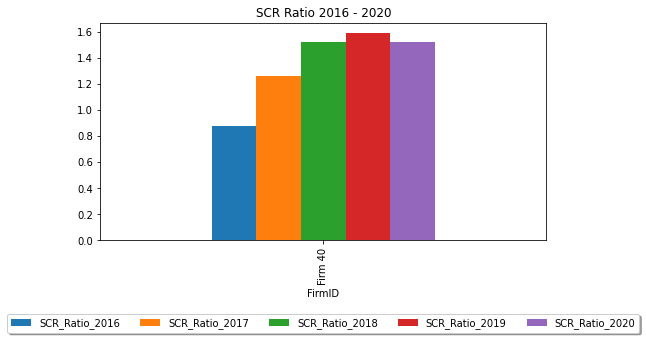

In [24]:
ax = SCR_SCRPlot.plot.bar(stacked=False, figsize=(8, 4))
ax.set_title('SCR Ratio 2016 - 2020')
ax.legend(loc='lower center',fancybox=True, shadow=True, ncol=5, bbox_to_anchor=(0.5, -0.45))

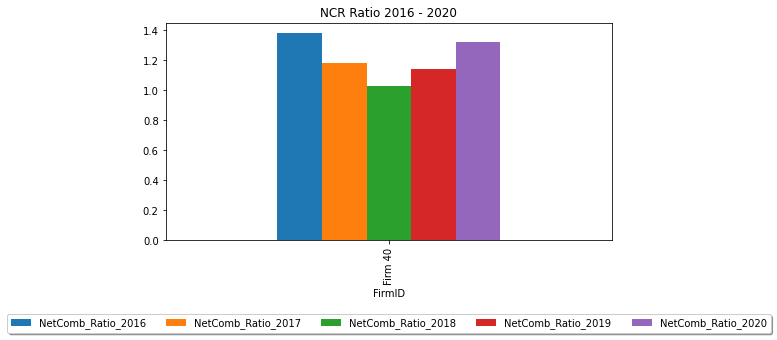

In [25]:
ax = SCR_NCRPlot.plot.bar(stacked=False, figsize=(8, 4))
ax.set_title('NCR Ratio 2016 - 2020')
ax.legend(loc='lower center',fancybox=True, shadow=True, ncol=5, bbox_to_anchor=(0.5, -0.45))

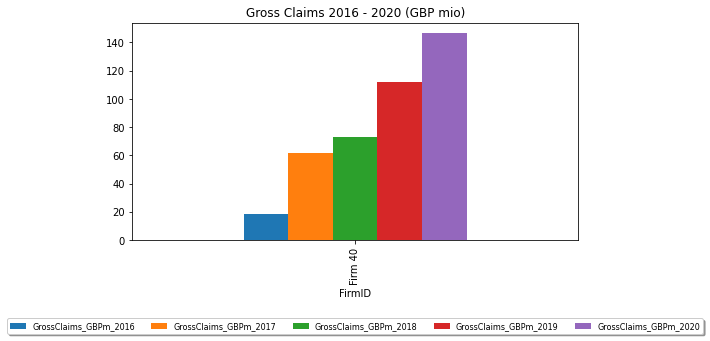

In [26]:
ax = SCR_GCPlot.plot.bar(stacked=False, figsize=(8, 4))
ax.set_title('Gross Claims 2016 - 2020 (GBP mio)')
ax.legend(loc='lower center', prop={'size': 8}, fancybox=True, shadow=True, ncol=5, bbox_to_anchor=(0.5, -0.45))

<font size="3"><b>Approach 2 - Size proxied by GWP in 2020 with threshold set at top 25%, with exceptional surging Gross Claims in any year 2017-2020 (proxied by Z-score of gross claims yoy growth rate)</b></font>

In [27]:
SurgingClaims_2017 = Large[(Large['GrossClaims_yoy_2017_Z']>3) & (Large['GrossClaims_GBPm_2017']!=0)]
SurgingClaims_2018 = Large[(Large['GrossClaims_yoy_2018_Z']>3) & (Large['GrossClaims_GBPm_2018']!=0)]
SurgingClaims_2019 = Large[(Large['GrossClaims_yoy_2019_Z']>3) & (Large['GrossClaims_GBPm_2019']!=0)]
SurgingClaims_2020 = Large[(Large['GrossClaims_yoy_2020_Z']>3) & (Large['GrossClaims_GBPm_2020']!=0)]
SurgingClaims_screen = pd.concat([SurgingClaims_2017, SurgingClaims_2018, SurgingClaims_2019, SurgingClaims_2020],axis=0)

SurgingClaims_screen = SurgingClaims_screen[key_attributes]
SurgingClaims_screen.round(2)
# Firm 192 and Firm 311 probably need monitoring as gross claims remained rising till 2020.  
# Firm 30 and 76 has no more gross claims last two years.  
# Firm 246 and 275 gross claims fall back to normal level in 2020.

,GWP_GBPm_2020,SCR_Ratio_2016,SCR_Ratio_2017,SCR_Ratio_2018,SCR_Ratio_2019,SCR_Ratio_2020,NetComb_Ratio_2016,NetComb_Ratio_2017,NetComb_Ratio_2018,NetComb_Ratio_2019,NetComb_Ratio_2020,NWP_as_pct_GWP_2016,NWP_as_pct_GWP_2017,NWP_as_pct_GWP_2018,NWP_as_pct_GWP_2019,NWP_as_pct_GWP_2020,GrossClaims_yoy_2017,GrossClaims_yoy_2018,GrossClaims_yoy_2019,GrossClaims_yoy_2020,GrossClaims_GBPm_2016,GrossClaims_GBPm_2017,GrossClaims_GBPm_2018,GrossClaims_GBPm_2019,GrossClaims_GBPm_2020
FirmID,,,,,,,,,,,,,,,,,,,,,,,,,
Firm 30,5442.88,1.58,1.54,1.61,1.58,1.52,0.00,0.00,0.00,0.00,0.00,0.99,0.99,1.00,0.99,0.91,7.12,-0.37,-1.00,0.00,-0.41,29.51,18.73,0.00,0.00
Firm 76,1955.00,1.41,1.25,1.28,1.18,1.44,0.00,0.00,0.00,0.00,0.00,0.87,1.26,1.26,1.23,1.12,7.12,-0.27,-1.00,0.00,0.17,3.23,2.37,0.00,0.00
Firm 246,510.50,1.42,1.29,1.25,1.90,1.46,-0.84,1.03,1.28,0.82,0.76,0.48,0.45,0.46,0.42,0.34,4.99,0.01,-0.15,-0.54,-3.23,12.86,13.03,11.04,5.03
Firm 192,319.34,2.84,2.25,1.84,1.45,1.95,0.00,0.00,1.13,1.10,1.06,0.83,0.42,0.41,0.51,0.69,0.00,0.00,2.24,1.51,0.00,0.00,8.33,27.00,67.74
Firm 275,613.44,2.70,2.61,2.09,2.57,1.76,0.60,1.30,0.73,1.18,0.75,0.26,0.28,0.28,0.30,0.38,4.01,-0.89,2.14,-0.97,173.11,866.81,96.09,301.74,10.25
Firm 311,19180.02,1.46,1.47,1.41,1.38,1.31,0.00,0.00,1.00,0.98,0.99,-0.32,0.85,0.73,0.67,0.56,0.00,0.00,2.51,1.97,0.00,0.00,1.26,11.90,35.41


In [28]:
SurgingClaims_screen.drop(['Firm 30','Firm 76', 'Firm 246', 'Firm 275'], inplace=True)
# Check Surging Claims Screen Output, create table for various key attributes
SurgingClaims_screen = SurgingClaims_screen[key_attributes]
SurgingClaims_SCRPlot = SurgingClaims_screen[SCR_attributes]
SurgingClaims_NCRPlot = SurgingClaims_screen[NCR_attributes]
SurgingClaims_NWPGWPPlot = SurgingClaims_screen[NWPGWP_attributes]
SurgingClaims_GCyoyPlot = SurgingClaims_screen[GC_yoy_attributes]
SurgingClaims_GCPlot = SurgingClaims_screen[GC_attributes]

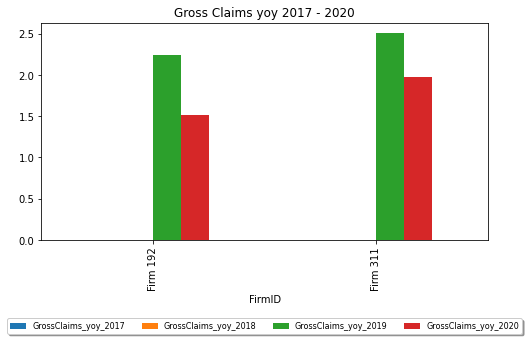

In [29]:
ax = SurgingClaims_GCyoyPlot.plot.bar(stacked=False, figsize=(8, 4))
ax.set_title('Gross Claims yoy 2017 - 2020')
ax.legend(loc='lower center', prop={'size': 8}, fancybox=True, shadow=True, ncol=5, bbox_to_anchor=(0.5, -0.45))

<font size="3"><b>Approach 3 - Size proxied by GWP in 2020 with threshold set at top 25%, Profitability under pressure over time, proxied by net combined ratio</b></font>

In [30]:
Large['NCR_2016_over1'] = np.where(Large['NetComb_Ratio_2016'] > 1, 1, 0)
Large['NCR_2017_over1'] = np.where(Large['NetComb_Ratio_2017'] > 1, 1, 0)
Large['NCR_2018_over1'] = np.where(Large['NetComb_Ratio_2018'] > 1, 1, 0)
Large['NCR_2019_over1'] = np.where(Large['NetComb_Ratio_2019'] > 1, 1, 0)
Large['NCR_2020_over1'] = np.where(Large['NetComb_Ratio_2020'] > 1, 1, 0)
Large['No_Yr_NCR_over1'] = Large['NCR_2016_over1'] + Large['NCR_2017_over1'] + Large['NCR_2018_over1'] + Large['NCR_2019_over1'] + Large['NCR_2020_over1']
NCR_Screen = Large[Large['No_Yr_NCR_over1']>=4]
NCR_Screen = NCR_Screen[key_attributes]
NCR_Screen.round(2)

C:\Users\Ben\AppData\Local\Temp\ipykernel_13756\3167664527.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Large['NCR_2016_over1'] = np.where(Large['NetComb_Ratio_2016'] > 1, 1, 0)
C:\Users\Ben\AppData\Local\Temp\ipykernel_13756\3167664527.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Large['NCR_2017_over1'] = np.where(Large['NetComb_Ratio_2017'] > 1, 1, 0)
C:\Users\Ben\AppData\Local\Temp\ipykernel_13756\3167664527.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

,GWP_GBPm_2020,SCR_Ratio_2016,SCR_Ratio_2017,SCR_Ratio_2018,SCR_Ratio_2019,SCR_Ratio_2020,NetComb_Ratio_2016,NetComb_Ratio_2017,NetComb_Ratio_2018,NetComb_Ratio_2019,NetComb_Ratio_2020,NWP_as_pct_GWP_2016,NWP_as_pct_GWP_2017,NWP_as_pct_GWP_2018,NWP_as_pct_GWP_2019,NWP_as_pct_GWP_2020,GrossClaims_yoy_2017,GrossClaims_yoy_2018,GrossClaims_yoy_2019,GrossClaims_yoy_2020,GrossClaims_GBPm_2016,GrossClaims_GBPm_2017,GrossClaims_GBPm_2018,GrossClaims_GBPm_2019,GrossClaims_GBPm_2020
FirmID,,,,,,,,,,,,,,,,,,,,,,,,,
Firm 4,34922.70,1.39,1.39,1.42,1.50,1.41,1.08,1.71,2.12,2.59,-0.19,0.76,0.73,0.72,0.71,0.72,3.41,0.58,-0.70,-0.82,17.13,75.54,119.43,35.88,6.57
Firm 19,2167.82,0.00,0.00,6.53,1.33,1.33,0.88,1.23,1.04,1.29,1.02,1.00,1.00,1.00,0.53,0.53,1.14,-0.20,0.45,-0.38,133.43,285.47,229.09,333.33,205.10
Firm 34,20510.75,1.49,1.49,1.55,1.57,1.42,0.00,3.10,1.51,1.31,1.66,0.78,0.46,0.26,-0.01,0.40,0.00,2.36,-0.50,-0.08,0.00,4.97,16.70,8.37,7.69
Firm 40,1184.46,0.88,1.26,1.52,1.59,1.52,1.38,1.18,1.03,1.14,1.32,0.94,0.94,0.91,0.20,0.40,2.37,0.19,0.53,0.31,18.23,61.45,73.17,111.93,146.76
Firm 72,499.75,2.00,1.68,2.31,2.32,2.41,42.54,-5.38,13.73,32.39,48.66,0.80,0.82,0.76,0.80,0.82,4.70,0.05,0.02,-0.51,-0.47,1.74,1.83,1.86,0.91
Firm 89,295.77,3.36,3.79,4.41,3.73,3.03,0.00,1.64,1.21,1.05,1.22,1.00,0.97,0.97,0.97,0.98,0.00,0.20,-0.07,0.69,0.00,59.58,71.47,66.15,111.71
Firm 165,387.75,2.47,2.32,1.58,1.53,1.41,1.05,1.03,1.10,1.19,1.29,0.59,0.64,0.69,0.75,0.76,-0.10,0.20,0.26,1.41,206.77,186.66,224.37,283.34,683.39
Firm 227,515.81,1.29,1.35,1.26,1.49,1.26,1.10,1.04,1.05,1.03,1.28,0.51,0.50,0.50,0.46,0.45,0.17,0.32,0.11,0.64,50.83,59.52,78.31,87.05,143.17
Firm 286,909.20,1.37,1.84,1.31,1.51,1.36,1.01,1.34,1.05,0.98,1.13,0.31,0.19,0.19,0.26,0.26,1.01,-0.12,-0.26,-0.04,992.66,1999.77,1755.01,1304.55,1258.30


In [31]:
# Check NCR Screen Output, create table for various key attributes
NCR_SCRPlot = NCR_Screen[SCR_attributes]
NCR_NCRPlot = NCR_Screen[NCR_attributes]
NCR_NWPGWPPlot = NCR_Screen[NWPGWP_attributes]
NCR_GCyoyPlot = NCR_Screen[GC_yoy_attributes]
NCR_GCPlot = NCR_Screen[GC_attributes]
NCR_NCRPlot.round(2)

,NetComb_Ratio_2016,NetComb_Ratio_2017,NetComb_Ratio_2018,NetComb_Ratio_2019,NetComb_Ratio_2020
FirmID,,,,,
Firm 4,1.08,1.71,2.12,2.59,-0.19
Firm 19,0.88,1.23,1.04,1.29,1.02
Firm 34,0.00,3.10,1.51,1.31,1.66
Firm 40,1.38,1.18,1.03,1.14,1.32
Firm 72,42.54,-5.38,13.73,32.39,48.66
Firm 89,0.00,1.64,1.21,1.05,1.22
Firm 165,1.05,1.03,1.10,1.19,1.29
Firm 227,1.10,1.04,1.05,1.03,1.28
Firm 286,1.01,1.34,1.05,0.98,1.13


<font size="3"><b>Approach 4 - Size proxied by GWP in 2020 with threshold set at top 25%, any year NWP/GWP ratio drop most as to reflect shifting most risk to reinsurer</b></font>


In [32]:
NWP_GWP_2017 = Large[(Large['NWP_GWP_Ratio_yoy_2017_Z']<-2) & (Large['NWP_GBPm_2017']>0) & (Large['NWP_GBPm_2016']>0) & (Large['NWP_as_pct_GWP_2017']<1)]
NWP_GWP_2018 = Large[(Large['NWP_GWP_Ratio_yoy_2018_Z']<-2) & (Large['NWP_GBPm_2018']>0) & (Large['NWP_GBPm_2017']>0) & (Large['NWP_as_pct_GWP_2018']<1)]
NWP_GWP_2019 = Large[(Large['NWP_GWP_Ratio_yoy_2019_Z']<-2) & (Large['NWP_GBPm_2019']>0) & (Large['NWP_GBPm_2018']>0) & (Large['NWP_as_pct_GWP_2019']<1)]
NWP_GWP_2020 = Large[(Large['NWP_GWP_Ratio_yoy_2020_Z']<-2) & (Large['NWP_GBPm_2020']>0) & (Large['NWP_GBPm_2019']>0) & (Large['NWP_as_pct_GWP_2020']<1)]
NWP_screen = pd.concat([NWP_GWP_2017, NWP_GWP_2018, NWP_GWP_2019, NWP_GWP_2020],axis=0)

NWP_screen = NWP_screen[key_attributes]
NWP_screen.round(2)

,GWP_GBPm_2020,SCR_Ratio_2016,SCR_Ratio_2017,SCR_Ratio_2018,SCR_Ratio_2019,SCR_Ratio_2020,NetComb_Ratio_2016,NetComb_Ratio_2017,NetComb_Ratio_2018,NetComb_Ratio_2019,NetComb_Ratio_2020,NWP_as_pct_GWP_2016,NWP_as_pct_GWP_2017,NWP_as_pct_GWP_2018,NWP_as_pct_GWP_2019,NWP_as_pct_GWP_2020,GrossClaims_yoy_2017,GrossClaims_yoy_2018,GrossClaims_yoy_2019,GrossClaims_yoy_2020,GrossClaims_GBPm_2016,GrossClaims_GBPm_2017,GrossClaims_GBPm_2018,GrossClaims_GBPm_2019,GrossClaims_GBPm_2020
FirmID,,,,,,,,,,,,,,,,,,,,,,,,,
Firm 40,1184.46,0.88,1.26,1.52,1.59,1.52,1.38,1.18,1.03,1.14,1.32,0.94,0.94,0.91,0.20,0.40,2.37,0.19,0.53,0.31,18.23,61.45,73.17,111.93,146.76
Firm 158,810.33,1.44,1.49,1.06,1.47,1.59,0.95,1.05,0.99,0.93,1.08,0.93,0.92,0.90,0.23,0.63,0.64,-0.08,-0.18,0.34,754.86,1235.98,1139.91,939.62,1257.65
Firm 182,471.94,1.47,1.36,1.32,1.28,1.45,0.00,0.00,0.00,0.00,0.00,0.68,0.91,0.92,0.91,0.20,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Firm 211,390.32,1.50,1.45,1.28,1.23,1.72,0.00,0.00,0.00,0.00,0.00,0.92,0.93,0.64,0.64,0.14,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [33]:
# Check NWP Screen Output, create table for various key attributes
NWP_SCRPlot = NWP_screen[SCR_attributes]
NWP_NCRPlot = NWP_screen[NCR_attributes]
NWP_NWPGWPPlot = NWP_screen[NWPGWP_attributes]
NWP_GCyoyPlot = NWP_screen[GC_yoy_attributes]
NWP_GCPlot = NWP_screen[GC_attributes]

In [34]:
NWP_NWPGWPPlot.round(2)

,NWP_as_pct_GWP_2016,NWP_as_pct_GWP_2017,NWP_as_pct_GWP_2018,NWP_as_pct_GWP_2019,NWP_as_pct_GWP_2020
FirmID,,,,,
Firm 40,0.94,0.94,0.91,0.20,0.40
Firm 158,0.93,0.92,0.90,0.23,0.63
Firm 182,0.68,0.91,0.92,0.91,0.20
Firm 211,0.92,0.93,0.64,0.64,0.14


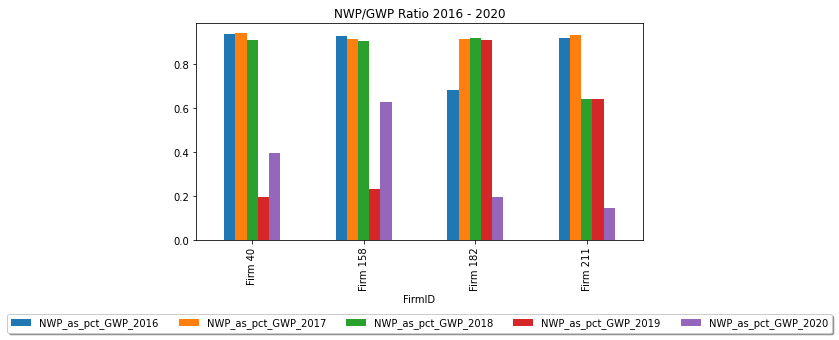

In [35]:
ax = NWP_NWPGWPPlot.plot.bar(stacked=False, figsize=(8, 4))
ax.set_title('NWP/GWP Ratio 2016 - 2020')
ax.legend(loc='lower center', prop={'size': 10}, fancybox=True, shadow=True, ncol=5, bbox_to_anchor=(0.5, -0.45))

<font size="3"><b>Create a summary list concluding all 4 approaches</b></font>

In [36]:
SCR_screen['SCR_Approach'] = 1
SurgingClaims_screen['Surging_Claims_Approach']=1
NCR_Screen['Net_Combined_Ratio_Approach']=1
NWP_screen['NWP/GWP_Approach']=1

summary_list = SCR_screen.merge(SurgingClaims_screen, on='FirmID', how='outer')
summary_list = summary_list.merge(NCR_Screen, on='FirmID', how='outer')
summary_list = summary_list.merge(NWP_screen, on='FirmID', how='outer')
summary_list = summary_list[['SCR_Approach','Surging_Claims_Approach','Net_Combined_Ratio_Approach','NWP/GWP_Approach']]
summary_list.fillna(0,inplace=True)
summary_list

C:\Users\Ben\AppData\Local\Temp\ipykernel_13756\1292784444.py:8: FutureWarning: Passing 'suffixes' which cause duplicate columns {'NWP_as_pct_GWP_2020_x', 'NWP_as_pct_GWP_2017_x', 'SCR_Ratio_2019_x', 'NWP_as_pct_GWP_2019_x', 'NWP_as_pct_GWP_2018_x', 'SCR_Ratio_2017_x', 'NetComb_Ratio_2018_x', 'GrossClaims_yoy_2020_x', 'GrossClaims_GBPm_2020_x', 'GrossClaims_yoy_2018_x', 'NetComb_Ratio_2016_x', 'GrossClaims_GBPm_2019_x', 'SCR_Ratio_2016_x', 'GWP_GBPm_2020_x', 'NetComb_Ratio_2020_x', 'GrossClaims_yoy_2019_x', 'GrossClaims_yoy_2017_x', 'SCR_Ratio_2020_x', 'SCR_Ratio_2018_x', 'NetComb_Ratio_2017_x', 'NWP_as_pct_GWP_2016_x', 'GrossClaims_GBPm_2017_x', 'NetComb_Ratio_2019_x', 'GrossClaims_GBPm_2016_x', 'GrossClaims_GBPm_2018_x'} in the result is deprecated and will raise a MergeError in a future version.
  summary_list = summary_list.merge(NWP_screen, on='FirmID', how='outer')
C:\Users\Ben\AppData\Local\Temp\ipykernel_13756\1292784444.py:10: SettingWithCopyWarning: 
A value is trying to be s

,SCR_Approach,Surging_Claims_Approach,Net_Combined_Ratio_Approach,NWP/GWP_Approach
FirmID,,,,
Firm 40,1.0,0.0,1.0,1.0
Firm 192,0.0,1.0,0.0,0.0
Firm 311,0.0,1.0,0.0,0.0
Firm 4,0.0,0.0,1.0,0.0
Firm 19,0.0,0.0,1.0,0.0
Firm 34,0.0,0.0,1.0,0.0
Firm 72,0.0,0.0,1.0,0.0
Firm 89,0.0,0.0,1.0,0.0
Firm 165,0.0,0.0,1.0,0.0


<font size="3"><b>Firm 40 Business Trend</b></font>

In [37]:
Firm_40 = active[active.index=='Firm 40']
year = np.array([2016,2017,2018,2019,2020])
GWP_Firm_40 = np.array(Firm_40[['GWP_GBPm_2016','GWP_GBPm_2017','GWP_GBPm_2018','GWP_GBPm_2019','GWP_GBPm_2020']].T).reshape(5,)
NWP_Firm_40 = np.array(Firm_40[['NWP_GBPm_2016','NWP_GBPm_2017','NWP_GBPm_2018','NWP_GBPm_2019','NWP_GBPm_2020']].T).reshape(5,)
NWPGWP_Firm_40 = np.array(Firm_40[['NWP_as_pct_GWP_2016','NWP_as_pct_GWP_2017','NWP_as_pct_GWP_2018','NWP_as_pct_GWP_2019','NWP_as_pct_GWP_2020']].T).reshape(5,)
SCR_Firm_40 = np.array(Firm_40[['SCR_Ratio_2016','SCR_Ratio_2017','SCR_Ratio_2018','SCR_Ratio_2019','SCR_Ratio_2020']].T).reshape(5,)
NCR_Firm_40 = np.array(Firm_40[['NetComb_Ratio_2016','NetComb_Ratio_2017','NetComb_Ratio_2018','NetComb_Ratio_2019','NetComb_Ratio_2020']].T).reshape(5,)
GC_Firm_40 = np.array(Firm_40[['GrossClaims_GBPm_2016','GrossClaims_GBPm_2017','GrossClaims_GBPm_2018','GrossClaims_GBPm_2019','GrossClaims_GBPm_2020']].T).reshape(5,)

df_firm_40 = pd.DataFrame({'Year':year, 'Gross Written Premium':GWP_Firm_40, 'Net Written Premium':NWP_Firm_40, 'NWP/GWP':NWPGWP_Firm_40, 'SCR Ratio':SCR_Firm_40, 'Net Combined Ratio':NCR_Firm_40, 'Gross Claims':GC_Firm_40})
df_firm_40.set_index('Year',drop=True,inplace=True)
df_firm_40

,Gross Written Premium,Net Written Premium,NWP/GWP,SCR Ratio,Net Combined Ratio,Gross Claims
Year,,,,,,
2016,1358.023151,1272.368235,0.936927,0.877304,1.381153,18.229866
2017,1306.187066,1230.025258,0.941692,1.259194,1.182086,61.446479
2018,1183.626564,1077.289613,0.910160,1.519051,1.026452,73.165354
2019,1162.646366,228.528865,0.196559,1.589852,1.142862,111.931773
2020,1184.460757,471.014008,0.397661,1.518542,1.323124,146.762333


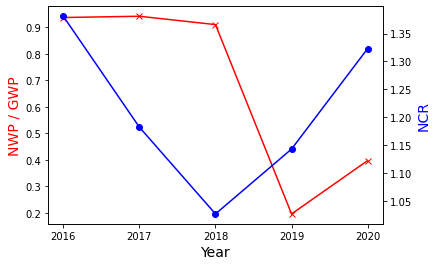

In [38]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(df_firm_40.index,
        df_firm_40['NWP/GWP'],
        color='red',
        marker='x',)
# set x-axis label
ax.set_xlabel('Year', fontsize = 14)
# set y-axis label
ax.set_ylabel('NWP / GWP',
              color='red',
              fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df_firm_40.index, df_firm_40['Net Combined Ratio'],color="blue",marker="o")
ax2.set_ylabel('NCR',color="blue",fontsize=14)
ax2.set_xticks(year)
plt.show()

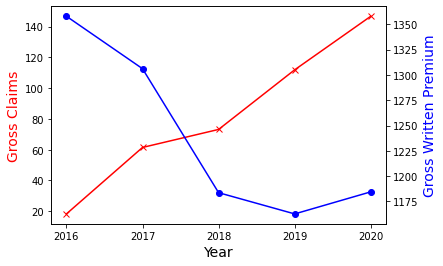

In [39]:
# create figure and axis objects with subplots()
fig,ax = plt.subplots()
# make a plot
ax.plot(df_firm_40.index,
        df_firm_40['Gross Claims'],
        color='red',
        marker='x',)
# set x-axis label
ax.set_xlabel('Year', fontsize = 14)
# set y-axis label
ax.set_ylabel('Gross Claims',
              color='red',
              fontsize=14)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(df_firm_40.index, df_firm_40['Gross Written Premium'],color="blue",marker="o")
ax2.set_ylabel('Gross Written Premium',color="blue",fontsize=14)
ax2.set_xticks(year)

plt.show()

<font size="3"><b>Task 2 - ML technique to draw further insights</b></font>
<br>
Since we have a set of numerical fact/data on a list of insurance companies, but no labels/regression target for prediction, I think the most intuitive way to analyse would be using unsupervised learning, trying to cluster the companies into differnt group.
<br>
My approach would first apply PCA and then use K-means to cluster the companies, then to check if differnet clusters demonstrate different behaviors in metrics

In [40]:
exclusion = active
excl_list = list(outliers.index) + list(missing_ncr.index) + list(missing_assetliabpremium.index)
excl_list = np.unique(excl_list)
for i in excl_list:
    exclusion.drop(i, inplace=True)

Standardize all columns

In [41]:
scaler = StandardScaler()
scaler.fit(exclusion)
filtered = pd.DataFrame(scaler.transform(exclusion))
filtered.columns = header_updated
filtered.index = active.index
filtered = filtered.add_suffix('_Z')

Apply PCA

In [42]:
pca = PCA(0.7)
pca.fit(filtered)
print(pca.explained_variance_ratio_)
print('There are ' + str(len(pca.explained_variance_ratio_)) + ' PCAs explaining 870% of data varaince')

PCA_header = ['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5', 'PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10', 
              'PCA11', 'PCA12']
PCA_df = pd.DataFrame(pca.transform(filtered))
PCA_df.columns = PCA_header
PCA_df.index = filtered.index
PCA_df.head()

[0.16031457 0.15251857 0.088706   0.07470439 0.04966237 0.03451178
 0.03322121 0.02796745 0.02674242 0.02475049 0.02271069 0.0211219 ]
There are 12 PCAs explaining 870% of data varaince


,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12
FirmID,,,,,,,,,,,,
Firm 4,-16.698679,25.644999,4.317864,-8.291131,1.614051,-7.732056,-14.280440,-0.729678,-0.068326,-2.365194,-1.289539,-4.558431
Firm 5,0.022609,-0.914219,-1.203420,0.569824,1.006178,-2.608532,-0.408366,-0.318068,0.692551,-3.336021,0.002228,-2.172135
Firm 6,-3.583131,4.593625,-0.448774,0.363681,0.663732,-0.920620,-0.719578,-0.447246,-0.042415,0.475831,-0.622867,0.667924
Firm 10,-6.145352,8.849556,2.090107,-3.720809,0.145934,1.334576,2.569741,0.687930,0.363097,-0.780263,0.706534,0.029580
Firm 12,0.415585,-1.925577,0.024830,-0.631132,0.057847,0.389537,0.812428,-0.207901,-0.066498,-0.216526,0.018322,1.767370


Determine K using Elbow method.  Curve became much less steep since K=4

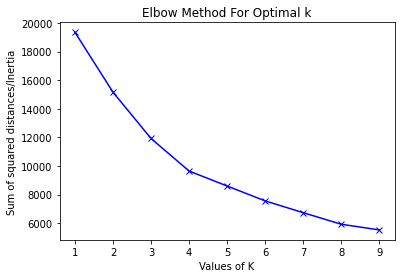

In [43]:
Sum_of_squared_distances = []
K = range(1,10)
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(PCA_df)
 Sum_of_squared_distances.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distances,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

K-means Prediction

Text(0.5, 1.0, 'No. of firms in Clusters')

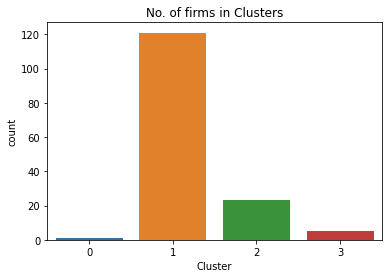

In [44]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(PCA_df)
cluster = pd.DataFrame(kmeans.predict(PCA_df))
cluster.columns = ['Cluster']
sns.countplot(x="Cluster", data=cluster).set_title('No. of firms in Clusters')

Cluster 1 could be quite unmeaningful as only 1 firm there.

In [45]:
# Add Cluster to data
cluster.index = filtered.index
cluster_companies = exclusion.join(cluster)

In [46]:
# Cluster Counts
cluster_companies.groupby('Cluster')['Cluster'].count().round(2)

Cluster
0      1
1    121
2     23
3      5
Name: Cluster, dtype: int64

<font size="3"><b>Draw characteristics on different clusters</b></font>

<u>Size</u>
<br>
Cluster 3 are mostly 'Large Cap'
<br>
Cluster 1 are smaller cap
<br>
Cluster 2 tend to have more missing data

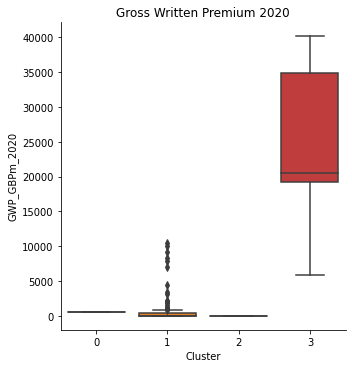

In [47]:
sns.catplot(x='Cluster', y='GWP_GBPm_2020', kind='box', data=cluster_companies).set(title='Gross Written Premium 2020')

In [48]:
cluster_companies.groupby('Cluster')['GWP_GBPm_2020'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,1.0,499.75,NaN,499.75,499.75,499.75,499.75,499.75
1,121.0,746.09,2003.03,-0.88,0.00,22.11,344.76,10489.25
2,23.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,5.0,24112.16,13654.91,5811.66,19180.02,20510.75,34922.70,40135.69


<u>SCR Ratio</u>
<br>
Cluster 2 are those mostly missing premiums/SCR ratio data
<br>
Cluster 3 has lower SCR ratio on average - larger firms tend to have lower SCR Ratio

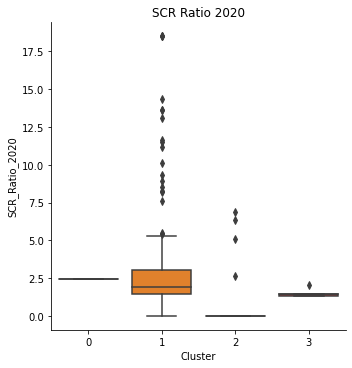

In [49]:
sns.catplot(x='Cluster', y='SCR_Ratio_2020', kind='box', data=cluster_companies).set(title='SCR Ratio 2020')

In [50]:
# SCR Ratio Statistics
cluster_companies.groupby('Cluster')['SCR_Ratio_2020'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,1.0,2.41,NaN,2.41,2.41,2.41,2.41,2.41
1,121.0,3.42,3.87,0.00,1.48,1.93,3.05,18.50
2,23.0,0.91,2.15,0.00,0.00,0.00,0.00,6.90
3,5.0,1.50,0.31,1.31,1.31,1.41,1.42,2.06


<u>NCR Ratio</u>
<br>
Cluster 1 median companies are profitable but average have NCR higher than 1, suggesting some of them making heavier losses
<br>
Cluster 3, the large one, median NCR at 1 but average below 1, suggest on average they are more profitable, maybe due to scale

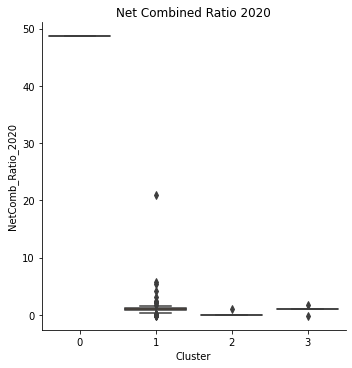

In [51]:
sns.catplot(x='Cluster', y='NetComb_Ratio_2020', kind='box', data=cluster_companies).set(title='Net Combined Ratio 2020')

In [52]:
# NCR Ratio Statistics
cluster_companies.groupby('Cluster')['NetComb_Ratio_2020'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,1.0,48.66,NaN,48.66,48.66,48.66,48.66,48.66
1,121.0,1.13,2.01,-0.19,0.76,0.93,1.11,21.00
2,23.0,0.05,0.22,0.00,0.00,0.00,0.00,1.06
3,5.0,0.90,0.67,-0.19,0.99,1.00,1.04,1.66


<u>NWP / GWP Ratio</u>
<br>
Cluster 3, the larger companies have lower ratio, indicates their tendency to use more reinsurance vs small companies

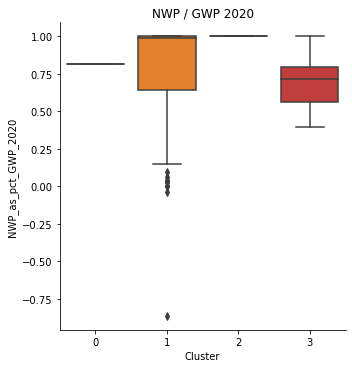

In [53]:
sns.catplot(x='Cluster', y='NWP_as_pct_GWP_2020', kind='box', data=cluster_companies).set(title='NWP / GWP 2020')

In [54]:
# NWP/GWP Ratio Statistics
cluster_companies.groupby('Cluster')['NWP_as_pct_GWP_2020'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
0,1.0,0.82,NaN,0.82,0.82,0.82,0.82,0.82
1,121.0,0.78,0.35,-0.86,0.64,0.99,1.00,1.00
2,23.0,1.00,0.00,1.00,1.00,1.00,1.00,1.00
3,5.0,0.70,0.23,0.40,0.56,0.72,0.80,1.00
